# Rozpoznawanie przypadków arytmii

Projekt polega na rozpoznawaniu arytmi na podstawie danych dotyczących zarówno pacjentów jak i ich wyników badań serca.

Rozpatrywana baza danych wejściowo posiada 279 atrybutów oraz 452 obiekty, z których część jest pusta. Dane nie posiadają nagłówków. Ostatni- atrybut decyzyjny posiada 16 możliwych parametrów (od 0 do 16), z czego każdy parametr powyżej jedynki oznacza występowanie pewnego rodzaju arytmii, a parametr o wartości 1 oznacza brak choroby.

Pracę rozpoczynamy od zaimportowanie odpowiednich pakietów.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
from skimage.exposure import histogram

Następnie zostaje wczytany zestaw danych oraz zostają dodane odpowiednie nagłówki.

In [2]:
original_data = pd.read_csv('arrhythmia.csv')

headings = [ 'Iterator', 'age', 'sex', 'height', 'weight', 'QRSduration', 

'PRinterval', 'Q-Tinterval', 'Tinterval', 'Pinterval', 'QRS', 

'T', 'P', 'QRST', 'J', 'heartrate', 

'chDI_Qwave', 'chDI_Rwave', 'chDI_Swave', 'chDI_RPwave', 'chDI_SPwave', 

'chDI_intrinsicReflecttions', 'chDI_RRwaveExists', 'chDI_DD_RRwaveExists', 'chDI_RPwaveExists', 'chDI_DD_RPwaveExists', 

'chDI_RTwaveExists', 'chDI_DD_RTwaveExists', 'chDII_Qwave', 'chDII_Rwave', 'chDII_Swave', 

'chDII_RPwave', 'chDII_SPwave', 'chDII_intrinsicReflecttions', 'chDII_RRwaveExists', 'chDII_DD_RRwaveExists', 

'chDII_RPwaveExists', 'chDII_DD_RPwaveExists', 'chDII_RTwaveExists', 'chDII_DD_RTwaveExists', 'chDIII_Qwave', 

'chDIII_Rwave', 'chDIII_Swave', 'chDIII_RPwave', 'chDIII_SPwave', 'chDIII_intrinsicReflecttions', 

'chDIII_RRwaveExists', 'chDIII_DD_RRwaveExists', 'chDIII_RPwaveExists', 'chDIII_DD_RPwaveExists', 'chDIII_RTwaveExists', 

'chDIII_DD_RTwaveExists', 'chAVR_Qwave', 'chAVR_Rwave', 'chAVR_Swave', 'chAVR_RPwave', 

'chAVR_SPwave', 'chAVR_intrinsicReflecttions', 'chAVR_RRwaveExists', 'chAVR_DD_RRwaveExists', 'chAVR_RPwaveExists', 

'chAVR_DD_RPwaveExists', 'chAVR_RTwaveExists', 'chAVR_DD_RTwaveExists', 'chAVL_Qwave', 'chAVL_Rwave', 

'chAVL_Swave', 'chAVL_RPwave', 'chAVL_SPwave', 'chAVL_intrinsicReflecttions', 'chAVL_RRwaveExists', 

'chAVL_DD_RRwaveExists', 'chAVL_RPwaveExists', 'chAVL_DD_RPwaveExists', 'chAVL_RTwaveExists', 'chAVL_DD_RTwaveExists', 

'chAVF_Qwave', 'chAVF_Rwave', 'chAVF_Swave', 'chAVF_RPwave', 'chAVF_SPwave', 

'chAVF_intrinsicReflecttions', 'chAVF_RRwaveExists', 'chAVF_DD_RRwaveExists', 'chAVF_RPwaveExists', 'chAVF_DD_RPwaveExists', 

'chAVF_RTwaveExists', 'chAVF_DD_RTwaveExists', 'chV1_Qwave', 'chV1_Rwave', 'chV1_Swave', 

'chV1_RPwave', 'chV1_SPwave', 'chV1_intrinsicReflecttions', 'chV1_RRwaveExists', 'chV1_DD_RRwaveExists', 

'chV1_RPwaveExists', 'chV1_DD_RPwaveExists', 'chV1_RTwaveExists', 'chV1_DD_RTwaveExists', 'chV2_Qwave', 

'chV2_Rwave', 'chV2_Swave', 'chV2_RPwave', 'chV2_SPwave', 'chV2_intrinsicReflecttions', 

'chV2_RRwaveExists', 'chV2_DD_RRwaveExists', 'chV2_RPwaveExists', 'chV2_DD_RPwaveExists', 'chV2_RTwaveExists', 

'chV2_DD_RTwaveExists', 'chV3_Qwave', 'chV3_Rwave', 'chV3_Swave', 'chV3_RPwave', 

'chV3_SPwave', 'chV3_intrinsicReflecttions', 'chV3_RRwaveExists', 'chV3_DD_RRwaveExists', 'chV3_RPwaveExists', 

'chV3_DD_RPwaveExists', 'chV3_RTwaveExists', 'chV3_DD_RTwaveExists', 'chV4_Qwave', 'chV4_Rwave', 

'chV4_Swave', 'chV4_RPwave', 'chV4_SPwave', 'chV4_intrinsicReflecttions', 'chV4_RRwaveExists', 

'chV4_DD_RRwaveExists', 'chV4_RPwaveExists', 'chV4_DD_RPwaveExists', 'chV4_RTwaveExists', 'chV4_DD_RTwaveExists', 

'chV5_Qwave', 'chV5_Rwave', 'chV5_Swave', 'chV5_RPwave', 'chV5_SPwave', 

'chV5_intrinsicReflecttions', 'chV5_RRwaveExists', 'chV5_DD_RRwaveExists', 'chV5_RPwaveExists', 'chV5_DD_RPwaveExists', 

'chV5_RTwaveExists', 'chV5_DD_RTwaveExists', 'chV6_Qwave', 'chV6_Rwave', 'chV6_Swave', 

'chV6_RPwave', 'chV6_SPwave', 'chV6_intrinsicReflecttions', 'chV6_RRwaveExists', 'chV6_DD_RRwaveExists', 

'chV6_RPwaveExists', 'chV6_DD_RPwaveExists', 'chV6_RTwaveExists', 'chV6_DD_RTwaveExists', 'chDI_JJwaveAmp', 

'chDI_QwaveAmp', 'chDI_RwaveAmp', 'chDI_SwaveAmp', 'chDI_RPwaveAmp', 'chDI_SPwaveAmp', 

'chDI_PwaveAmp', 'chDI_TwaveAmp', 'chDI_QRSA', 'chDI_QRSTA', 'chDII_JJwaveAmp', 

'chDII_QwaveAmp', 'chDII_RwaveAmp', 'chDII_SwaveAmp', 'chDII_RPwaveAmp', 'chDII_SPwaveAmp', 

'chDII_PwaveAmp', 'chDII_TwaveAmp', 'chDII_QRSA', 'chDII_QRSTA', 'chDIII_JJwaveAmp', 

'chDIII_QwaveAmp', 'chDIII_RwaveAmp', 'chDIII_SwaveAmp', 'chDIII_RPwaveAmp', 'chDIII_SPwaveAmp', 

'chDIII_PwaveAmp', 'chDIII_TwaveAmp', 'chDIII_QRSA', 'chDIII_QRSTA', 'chAVR_JJwaveAmp', 

'chAVR_QwaveAmp', 'chAVR_RwaveAmp', 'chAVR_SwaveAmp', 'chAVR_RPwaveAmp', 'chAVR_SPwaveAmp', 

'chAVR_PwaveAmp', 'chAVR_TwaveAmp', 'chAVR_QRSA', 'chAVR_QRSTA', 'chAVL_JJwaveAmp', 

'chAVL_QwaveAmp', 'chAVL_RwaveAmp', 'chAVL_SwaveAmp', 'chAVL_RPwaveAmp', 'chAVL_SPwaveAmp', 

'chAVL_PwaveAmp', 'chAVL_TwaveAmp', 'chAVL_QRSA', 'chAVL_QRSTA', 'chAVF_JJwaveAmp', 

'chAVF_QwaveAmp', 'chAVF_RwaveAmp', 'chAVF_SwaveAmp', 'chAVF_RPwaveAmp', 'chAVF_SPwaveAmp', 

'chAVF_PwaveAmp', 'chAVF_TwaveAmp', 'chAVF_QRSA', 'chAVF_QRSTA', 'chV1_JJwaveAmp', 

'chV1_QwaveAmp', 'chV1_RwaveAmp', 'chV1_SwaveAmp', 'chV1_RPwaveAmp', 'chV1_SPwaveAmp', 

'chV1_PwaveAmp', 'chV1_TwaveAmp', 'chV1_QRSA', 'chV1_QRSTA', 'chV2_JJwaveAmp', 

'chV2_QwaveAmp', 'chV2_RwaveAmp', 'chV2_SwaveAmp', 'chV2_RPwaveAmp', 'chV2_SPwaveAmp', 

'chV2_PwaveAmp', 'chV2_TwaveAmp', 'chV2_QRSA', 'chV2_QRSTA', 'chV3_JJwaveAmp', 

'chV3_QwaveAmp', 'chV3_RwaveAmp', 'chV3_SwaveAmp', 'chV3_RPwaveAmp', 'chV3_SPwaveAmp', 

'chV3_PwaveAmp', 'chV3_TwaveAmp', 'chV3_QRSA', 'chV3_QRSTA', 'chV4_JJwaveAmp', 

'chV4_QwaveAmp', 'chV4_RwaveAmp', 'chV4_SwaveAmp', 'chV4_RPwaveAmp', 'chV4_SPwaveAmp', 

'chV4_PwaveAmp', 'chV4_TwaveAmp', 'chV4_QRSA', 'chV4_QRSTA', 'chV5_JJwaveAmp', 

'chV5_QwaveAmp', 'chV5_RwaveAmp', 'chV5_SwaveAmp', 'chV5_RPwaveAmp', 'chV5_SPwaveAmp', 

'chV5_PwaveAmp', 'chV5_TwaveAmp', 'chV5_QRSA', 'chV5_QRSTA', 'chV6_JJwaveAmp', 

'chV6_QwaveAmp', 'chV6_RwaveAmp', 'chV6_SwaveAmp', 'chV6_RPwaveAmp', 'chV6_SPwaveAmp', 

'chV6_PwaveAmp', 'chV6_TwaveAmp', 'chV6_QRSA', 'chV6_QRSTA', 'class']

original_data.columns = headings

original_data.drop(columns = 'Iterator')

print(original_data.head())

   Iterator  age  sex  height  weight  QRSduration  PRinterval  Q-Tinterval  \
0         0   75    0     190      80           91         193          371   
1         1   56    1     165      64           81         174          401   
2         2   54    0     172      95          138         163          386   
3         3   55    0     175      94          100         202          380   
4         4   75    0     190      80           88         181          360   

   Tinterval  Pinterval  ...  chV6_QwaveAmp chV6_RwaveAmp chV6_SwaveAmp  \
0        174        121  ...            0.0           9.0          -0.9   
1        149         39  ...            0.0           8.5           0.0   
2        185        102  ...            0.0           9.5          -2.4   
3        179        143  ...            0.0          12.2          -2.2   
4        177        103  ...            0.0          13.1          -3.6   

  chV6_RPwaveAmp chV6_SPwaveAmp chV6_PwaveAmp  chV6_TwaveAmp  chV6_QRSA  \

Wyświetlamy podstawowe parametry naszego zbioru.

In [3]:
original_data.info()
original_data.head()
original_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 281 entries, Iterator to class
dtypes: float64(120), int64(156), object(5)
memory usage: 992.4+ KB


,Iterator,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,225.500000,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,130.625419,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,112.750000,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,225.500000,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,338.250000,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,451.000000,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


Ponieważ wstępnie osiadamy wiedzę na temat pustych elementów w zbiorze postanowiliśmy zbadać to zjawisko i wyświetlić ilość pustych parametrów dla konkretnych przebiegów EKG.

In [4]:
print('Puste dane:')
pd.isnull(original_data).sum().sum()

Puste dane:


0

Po zsumowaniu pustych parametrów okazało się, że są one oznaczone znakiem zapytania, co wymagało od nas podniemienia tych wartości w zbiorze na wartości puste, w celu przeprowadzenia analizy.

In [5]:
original_data = original_data.replace('?', np.NAN)

In [6]:
print('Puste dane:')
pd.isnull(original_data).sum().sum()

Puste dane:


408

Gdy mamy już wiedzę na temat ilości wartości pustych w zbiorze, wyświetlamy wykres, który pokazuje dla jakich parametrów występouje najwięcej pustych wartości.

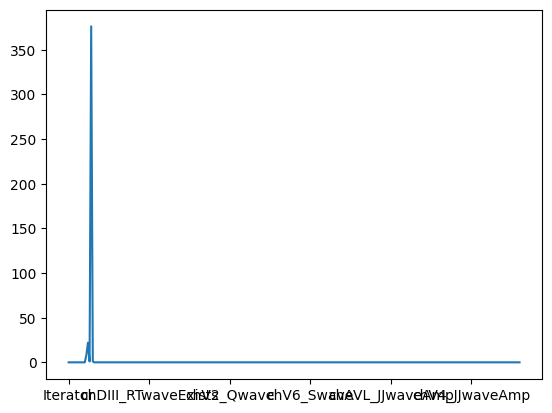

In [7]:
pd.isnull(original_data).sum().plot()

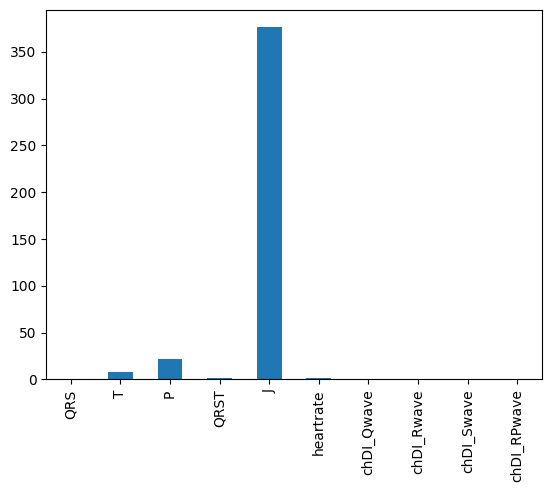

In [8]:
pd.isnull(original_data).iloc[:, 10:20].sum().plot(kind = 'bar')

Po analizie pustych elementów zbioru okazało się, że większość pustych pól należy do atrybutu "J". W celu dalszego przetwarzania należy więc usunąć tą kolumnę z dalszej analizy, po czym następnie usunąć obiekty z elementami pustymi.

In [9]:
original_data = original_data.drop(['J'], axis = 1)

In [10]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, Iterator to class
dtypes: float64(120), int64(156), object(4)
memory usage: 988.9+ KB


In [11]:
original_data = original_data.dropna()

Na tak przygotowanym zbiorze można przejść do wykonania analizy eksploracyjnej.

# Analiza eksploracyjna


Najpierw postanowiłyśmy określić, jaka jest ilość obiektów w poszczególnych klasach, czyli ile przypadków testowych do każdego typu arytmii posiadamy.

Ilość normalnych przypadków: 237


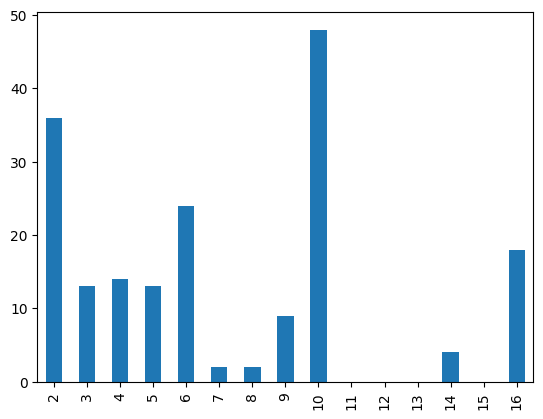

In [12]:
counter = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in original_data.iloc[:, -1]:
    counter[i-1] += 1
    counter

print('Ilość normalnych przypadków:', counter[0])
counter = pd.Series(counter[1:16], index = [2, 3, 4, 5, 6, 7, 8, 9, 10 , 11, 12, 13, 14, 15, 16])
counter.plot(kind = 'bar')

W zbiorze występuje znaczna ilość przypaków "normalnych", dlatego nie wyświetlamy ich na powyższym grafie, aby nie zaburzac wyglądu diagramu. Można zauważyć, że wśród wszystkich przypadków występowania arytmii najwięcej występuje przypadków dla grupy 10.
W dalszych krokach będziemy badać, jaka populacja bierze udział w badaniu. Dla klas 11, 12, 13, 15 można zobaczyć, że nie instnieją reprezentanci. Nasz klasyfikator nie będzie zdolny do rozróżniania tego typu arytmii.

Mediana wieku: 46.05
Ile pacjentów z arytmią: 183
Ilość kobiet: 235
Ilość kobiet: 185


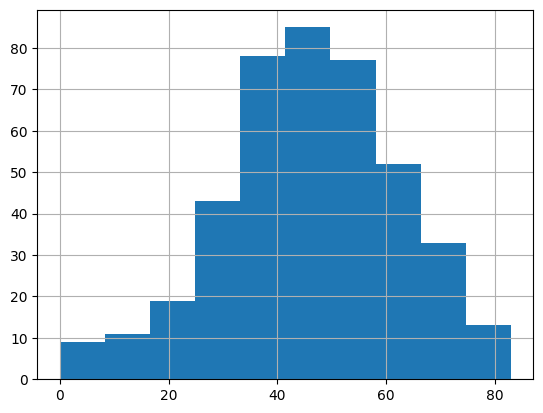

In [13]:
original_data['age'].hist( bins = 10).plot()
print('Mediana wieku:', original_data['age'].mean())
print('Ile pacjentów z arytmią:', len(np.where(original_data['class'] != 1)[0]))
print('Ilość kobiet:', len(np.where(original_data['sex'] == 1)[0]))
print('Ilość kobiet:', len(np.where(original_data['sex'] == 0)[0]))

Średnia wieku badanej grupy to 46 lat, z czego 183 z badanych przypadków posiada arytmię. Można wnioskować, że w tej grupie wiekowej arytmia pojawia się najczęściej. W zbiorze występuje także więcej kobiet (50 więcej), przez co porównywanie liczebności występujących arytmii pomiędzy grupami płuciowymi może być zaburzone.
Dokonamy teraz analizy podstawowych parametrów badanych osób takich jak wzrost, waga czy płeć.

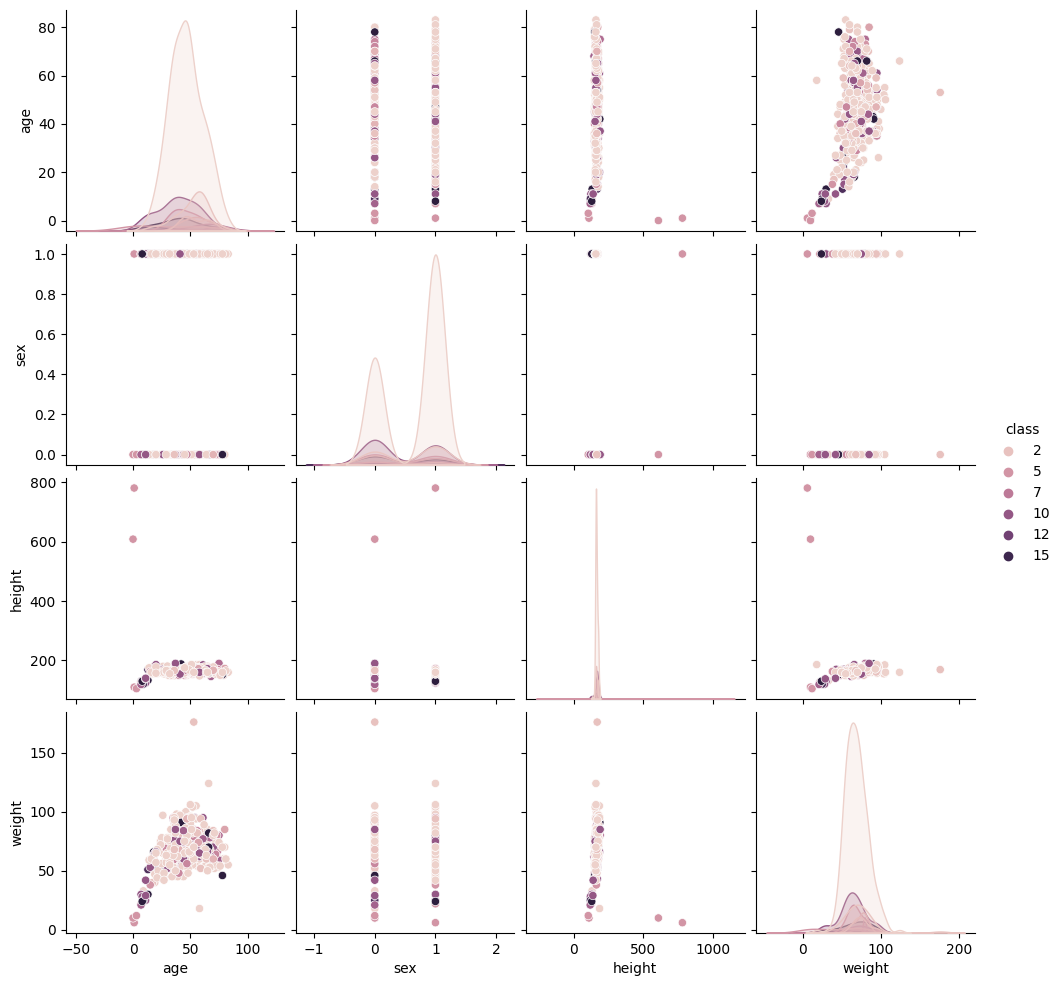

In [14]:
people_data = original_data.iloc[:,[1,2, 3, 4, -1]]
sns.pairplot(people_data, kind = 'scatter', hue = 'class')

Można zaobserwować, że przypadków kobiet w grupie badawczej jest więcej, a większość badanych posiada w miarę prawidłowy wzrost oraz wagę w stosunku do swojego wieku.

W obecnym momencie uznałyśmy, że analiza poszczególnych atrybutów jest nie tylko uciążliwa, ale także nie daje zbyt wysokich wyników klasyfikacji na zbiorze testowym. Dlatego postanowiłyśmy na wstępne zdobycie wiedzy o dziedzinie problemowej. Poniższe wykresy będą weryfikować nasze przypuszczenia.

Wiedzę z poniższego opisu głównie będziemy czerpać ze strony zamieszczonej w tym linku: https://www.nurseslearning.com/courses/nrp/nrp1619/section%202/p01.html

Podziału arytmii dokonuje się za pomocą miejsca występowania arytmii oraz rodzaju mechanizmu na nią odpowiedzialną.
W arytmiach zatokowych najważniejszymi parametrami są: <br>
    1. **Częstość**- praidłowo od 60-100, może być zmienne w zależności od tego, czy wistępuje wdech czy wydech. <br>
    2. **Rytm**- w zaburzeniach nieregularny, występuje różnica w interwałach RR, których nie posiadamy w zbiorze testowym <br>
    3. **Załamek P**- Załamki P w tych artmiach są prawidłowe. <br>
    4. **Odstęp PR**- po każdym załamku P jest prawidłowy zespół QRS <br>
    5. **Zespół QRS**- występuje normalna szerokość tego zespołu <br>

Poniżej wyświetlamy wykres zależności klas od parametru heartrate.

In [15]:
def boxplot_with_classes_on_axis_x (parameter):
    sns.boxplot( x = original_data['class'], y = original_data[parameter], orient = 'v')
    
def to_numeric_type (a, b):
    for i in range(a, b):
        original_data.iloc[:, i] = pd.to_numeric(original_data.iloc[:, i])

In [16]:
def print_boxplot_for_parameters (params):
    plt.figure(figsize=(10,20), dpi= 80)
    witch_plot = 1
    for i in range(len(params)):
        plt.subplot(len(params)//2 + 1, 2, witch_plot)
        if(i in [11, 12, 13, 15]):
            continue
        witch_plot +=1
        plt.xticks(rotation = 45)
        boxplot_with_classes_on_axis_x(params[i])
        
data_names = original_data.columns

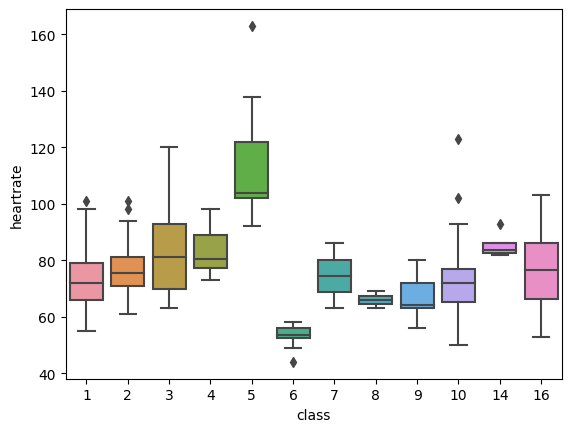

In [17]:
to_numeric_type(0,280)
boxplot_with_classes_on_axis_x('heartrate')

Można stwierdzić, że dla klasy 5 można stwiedzić **Tachykardię zatokową**, co potwierdzimy analizując inne parametry, które powinny być prawidłowe, taki sam przypadek powinnen być dla klasy 6, w której można przypuszczać występwanie **Bradykardii zatokowej**.

Dla powyższych rodzaji arytmii Fala P, Odstęp PR i zespół QRS powinny być prawidłowe.

In [18]:
def boxplot_for_choosen_classes(param, classes):
    data_for_classes = original_data[(original_data['class'].isin(classes))]
    sns.boxplot(data = data_for_classes, y = param, x = 'class', orient = 'v')
def boxplot_for_choosen_classes_for_some_params(params, classes):
    plt.figure(figsize=(12,20), dpi= 80)
    for i in range(len(params)):
        plt.subplot(len(params)//2 + 1, 2, i+1)
        boxplot_for_choosen_classes(params[i], classes)

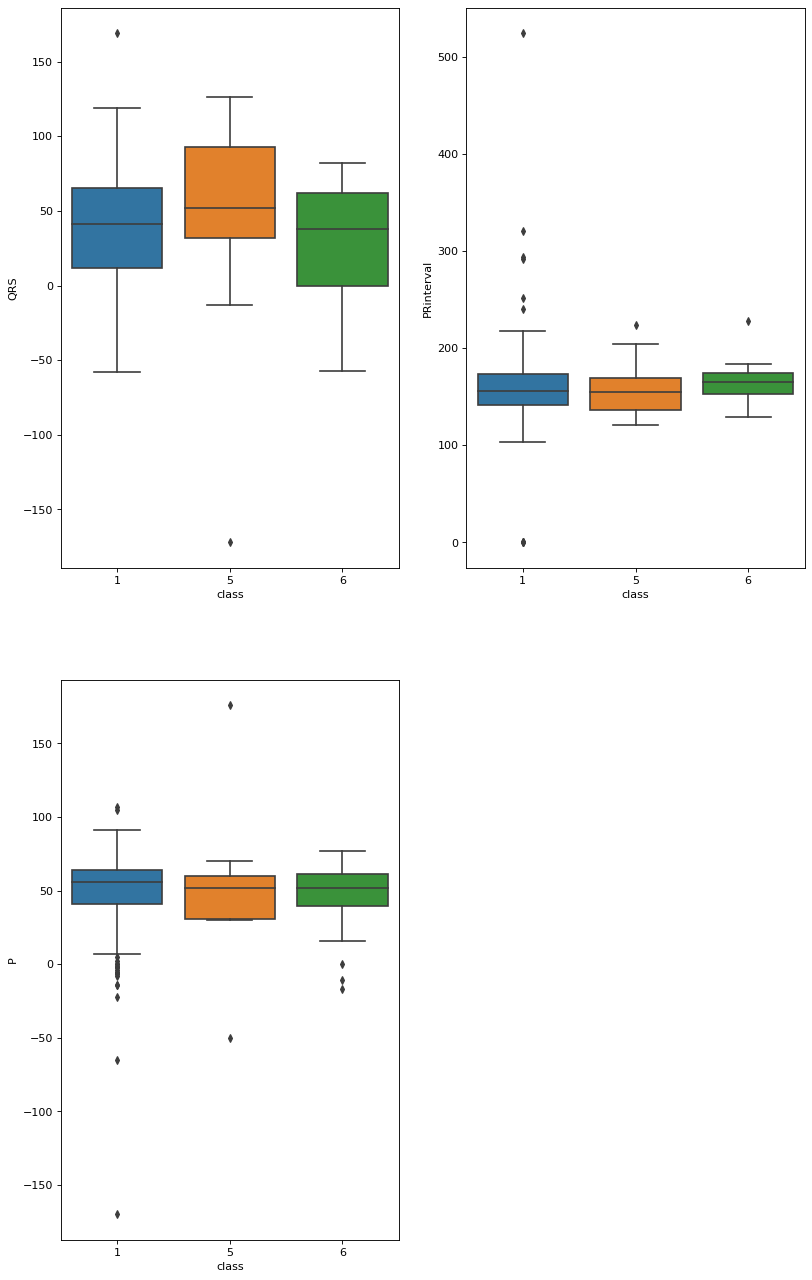

In [19]:
boxplot_for_choosen_classes_for_some_params(['QRS', 'PRinterval', 'P'], [1, 5, 6])

Można zauważyć, że parametry te przyjmują wartości z podobnych przedziałów, co jest zgodne z założeniami. Wnioskujemy, że do klasyfikacji konieczne będzie wykorzystanie parametru **heartrate**.

Kolejnym rodzajem arytmii są arytmie przedsionkowe. Jedną z nich jest **Tachykardia przedsionkowa i napadowa** oraz **częstoskurcz napadowy (PAT)**. Ten rodzaj arytmii charakteryzuje się zmienionym prztałtem fali P oraz nieprawidłowo ukrztałtowanymi załamkami P, jeśli zmiana taka nie jest ukryta przez poprzedzający załamek T. Z tego tytułu należy przeanalizować występowanie niedopowiednich amplitud fali P oraz samą falę P.

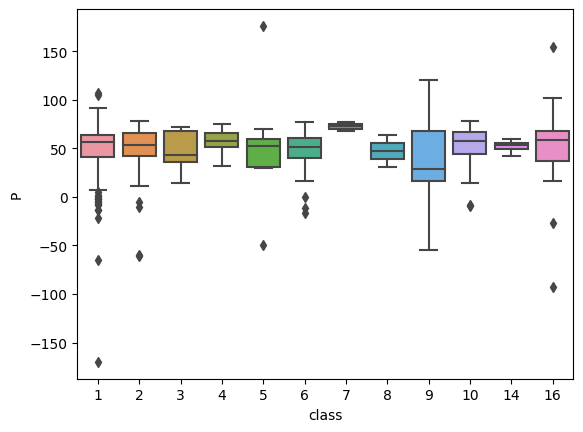

In [20]:
boxplot_with_classes_on_axis_x('P')

Można zauważyć, że klasa 7 Różni się w porównaniu do pozostałch klas. Tą klasę przeanalizujemy pod względem amplitud i fal P.

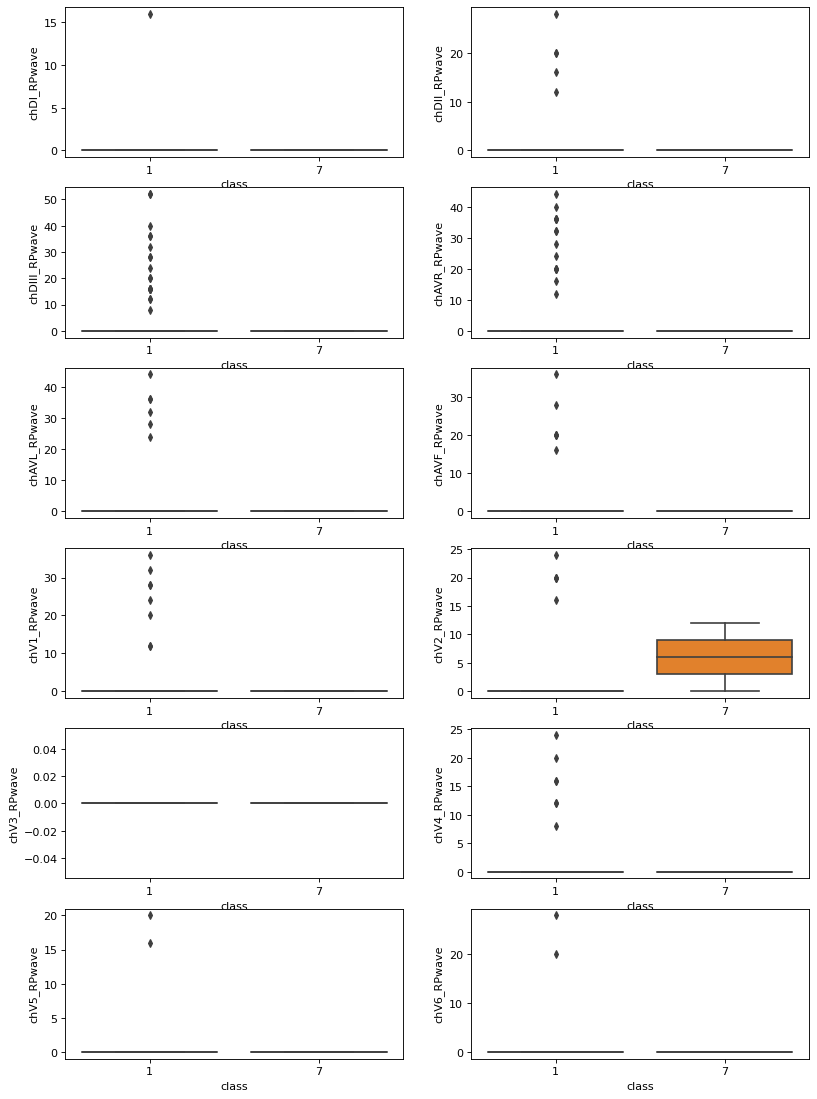

In [21]:
boxplot_for_choosen_classes_for_some_params(['chDI_RPwave', 'chDII_RPwave', 'chDIII_RPwave',
                                             'chAVR_RPwave', 'chAVL_RPwave', 'chAVF_RPwave', 'chV1_RPwave', 'chV2_RPwave',
                                            'chV3_RPwave', 'chV4_RPwave', 'chV5_RPwave', 'chV6_RPwave'],[1, 7])

Widać, że dla kanału 2 wartość fali P dla klasy 7 znacznie różni się od podstawowej.

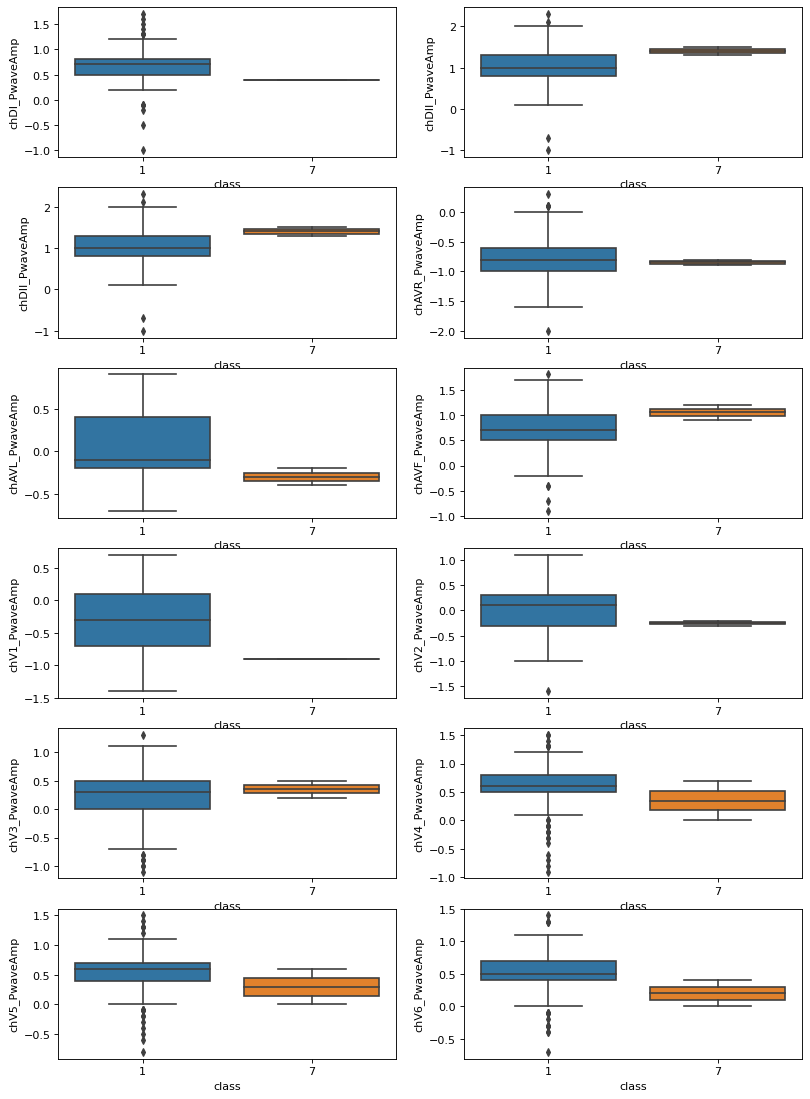

In [22]:
boxplot_for_choosen_classes_for_some_params(['chDI_PwaveAmp', 'chDII_PwaveAmp', 'chDII_PwaveAmp',
                                            'chAVR_PwaveAmp', 'chAVL_PwaveAmp', 'chAVF_PwaveAmp',
                                            'chV1_PwaveAmp', 'chV2_PwaveAmp', 'chV3_PwaveAmp',
                                            'chV4_PwaveAmp', 'chV5_PwaveAmp', 'chV6_PwaveAmp'], [1, 7])

Można zauważyć, że dla kanału V1 oraz amplitudy fali P klasa 7 różni się od klasy 1 (braku arytmii). Możemy uznać, że parametr ten będzie znaczący w klasyfikacji **Tachykardii przedsionkowej i napadowej**.

Następnym rodzajem jest **Trzepotanie przedsionków**. Jego występowanie można stwierdzić, gdy załamki P pojawiają się zbyt szybko. W celu określenia takiego stanu liczymy parametr, który określa zależność pomiędzy ilośćią fal P w stosunku do cykli RP.

In [23]:
is_heartrate_equals_QRS = []
for i in range(len(original_data)):
    if(original_data.iloc[i, 6] + original_data.iloc[i, 5] > original_data.iloc[i, 9]):
        is_heartrate_equals_QRS.append(1)
    else:
        is_heartrate_equals_QRS.append(0)
        
original_data['RPandPcomparsion'] = is_heartrate_equals_QRS

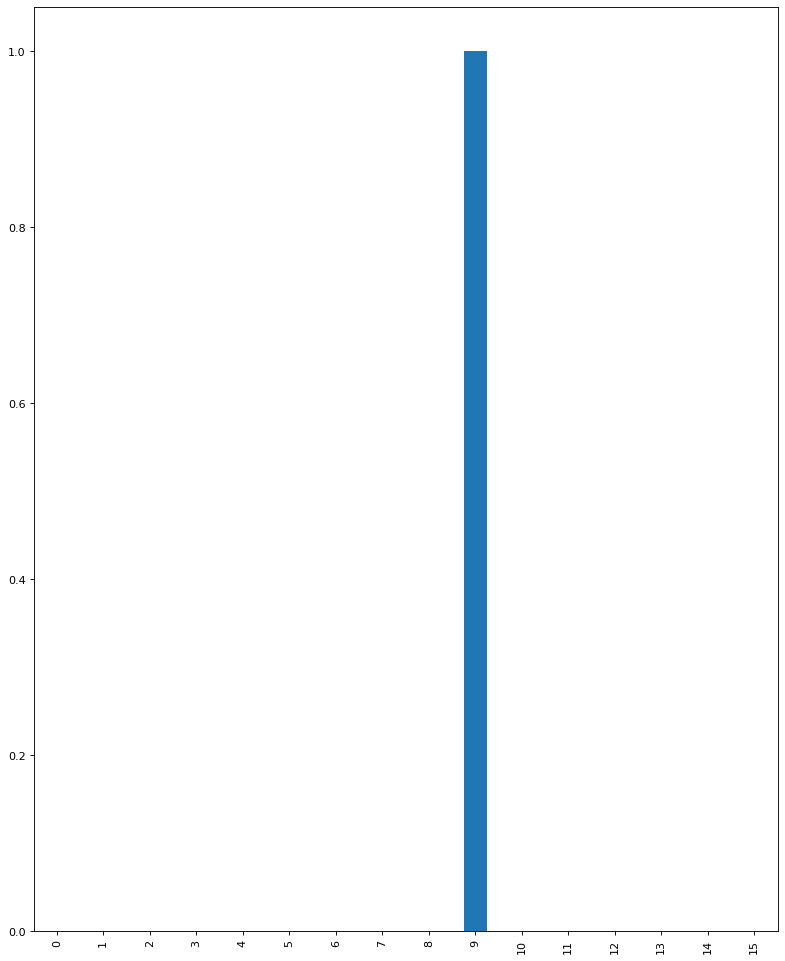

In [24]:
counter = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range(len(original_data['class'])):
    try:
        if(original_data['RPandPcomparsion'][i] == 0):
            counter[original_data['class'][i] - 1] += 1
    except:
        continue

series = pd.Series(counter)
    
plt.figure(figsize=(12,15), dpi= 80)
series.plot(kind = 'bar')


Widać, że wartość ta jest wysoka dla klasy 10, możemy ją podejrzewać o występwanie **Trzepotania przedsionków**.

Kolejnym typem arytmiii jest **Migotanie przedsionków**. Występuje ono, gdy załamki P nie pokazują się, pojawiają się falowanie. W celu zdiagnozowania tej arytmii przyjrzymy się występowaniu załamka P w poszczególnych kanałach.

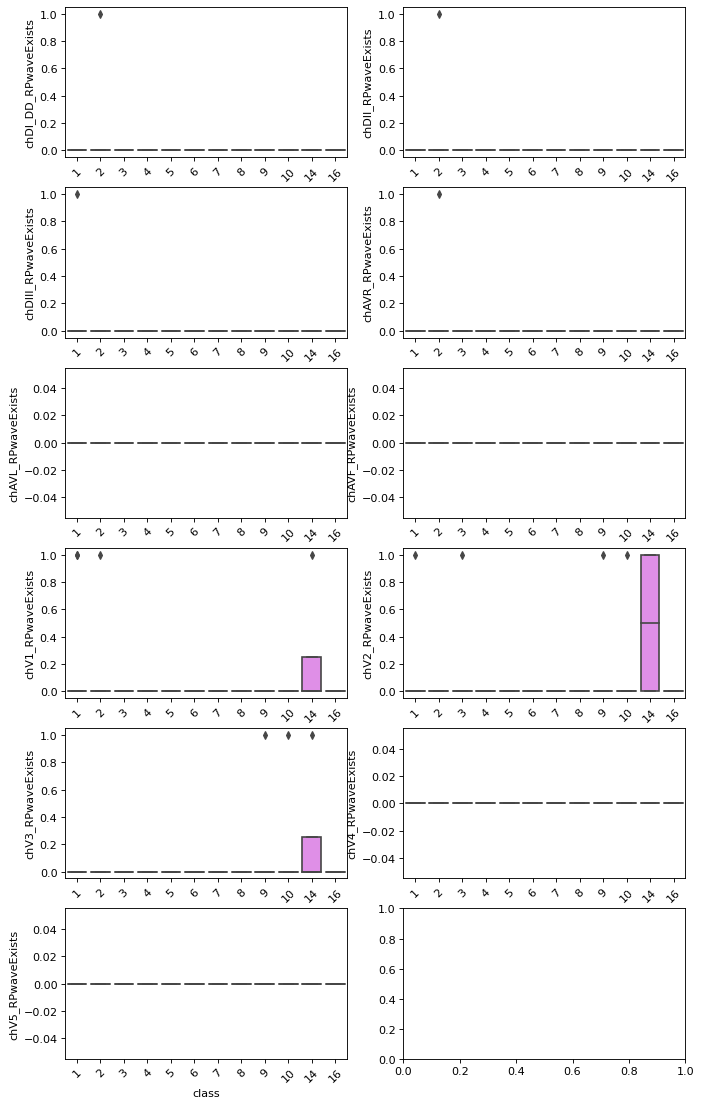

In [25]:
classes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
print_boxplot_for_parameters(['chDI_DD_RPwaveExists', 'chDII_RPwaveExists', 'chDIII_RPwaveExists',
                             'chAVR_RPwaveExists', 'chAVL_RPwaveExists', 'chAVF_RPwaveExists',
                             'chV1_RPwaveExists', 'chV2_RPwaveExists', 'chV3_RPwaveExists',
                             'chV4_RPwaveExists', 'chV5_RPwaveExists', 'chV6_RPwaveExists'])

Jak widać po parametrach RPwaveExists dla kanałów V1, V2 i V3 można zaobserwować występowanie fali RP. Pozwala to na zaliczenie klasy 14 jako **Migotania przedsionków**.

Kolejnym typem arytmii są **Przedwczesne skurcze przedsionków**. W nawiązaniu do wiedzy medycznej interwał P powinnien pozwolić na wykrycie tego typu arytmii. Dokładniej zakres zmienności interwału powinnien być wąski.

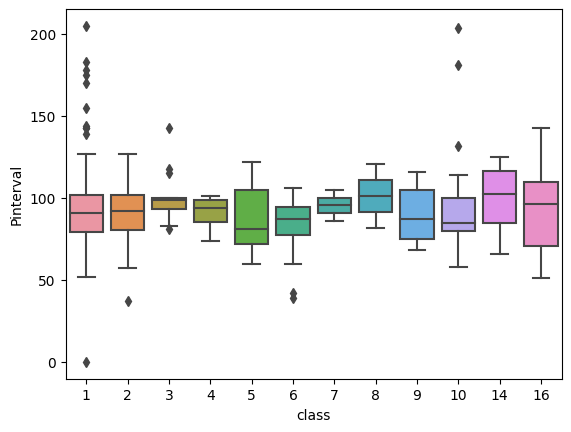

In [26]:
boxplot_with_classes_on_axis_x('Pinterval')

Z powyższego wykresu można stwierdzić, że interwał P jest wąski dla klasy 3 arytmii. Może to wskazywać, że w klasie 3 występują właśnie **Przedwczesne skurcze przedsionków**. Przypuszczenia te można potwierdzić za pomocą przebiegu R, który powinnen być strzelisty i wąski.

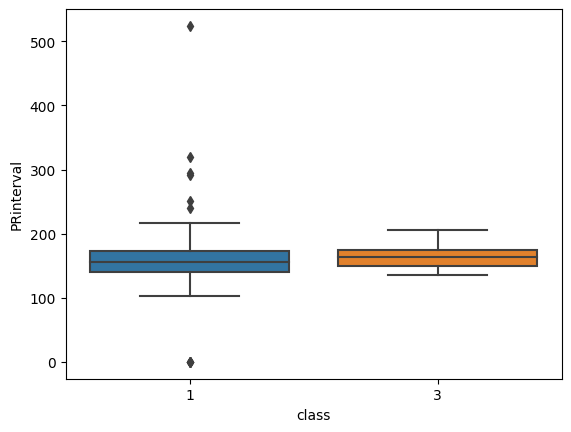

In [27]:
boxplot_for_choosen_classes('PRinterval', [1, 3])

Można zauważyć, że dla klasy 3 interwał ten jest trochę węższy niż dla zdrowej osoby. Uznaję ten parametr w takim razie za **Przedwczesne skurcze przedsionków**.

Kolejnym rodzajem arytmii są **Skurcze węzłowe**. Choroba ta jest powiązana z występowaniem fali Pardeego. Analizę występwania tej fali przeprowadzamy poniżej.

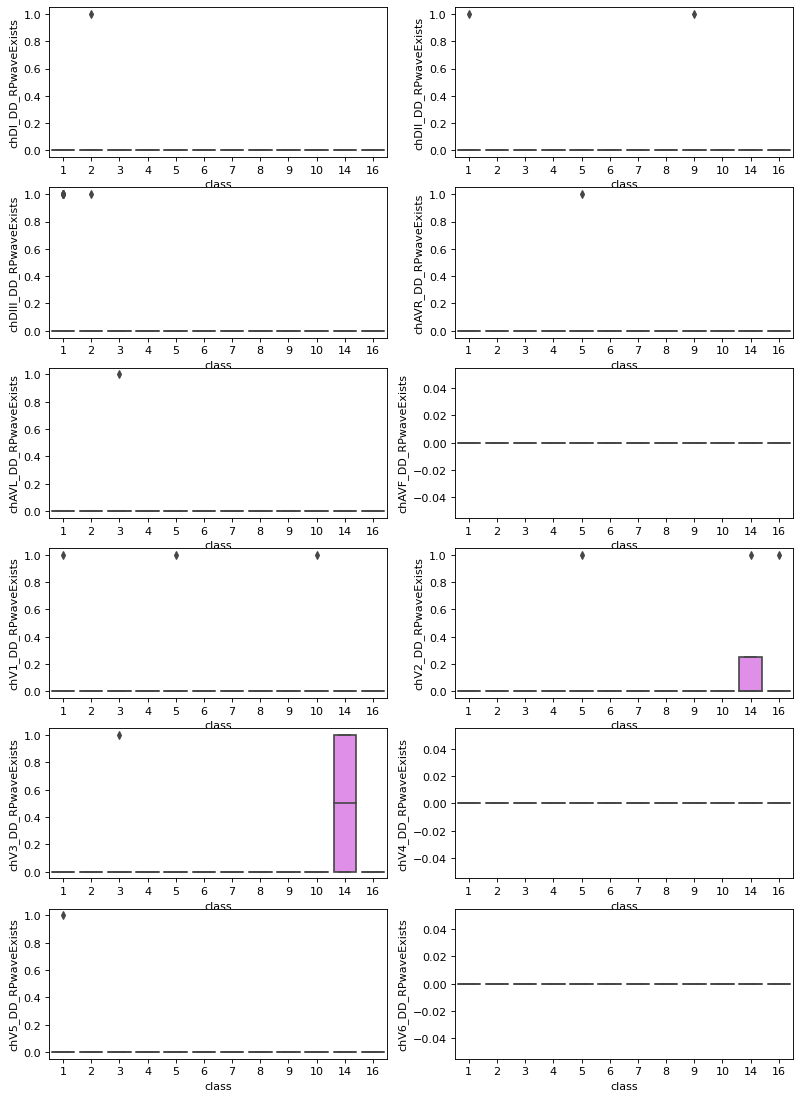

In [28]:
boxplot_for_choosen_classes_for_some_params(['chDI_DD_RPwaveExists','chDII_DD_RPwaveExists', 'chDIII_DD_RPwaveExists',
                                            'chAVR_DD_RPwaveExists', 'chAVL_DD_RPwaveExists', 'chAVF_DD_RPwaveExists',
                                            'chV1_DD_RPwaveExists', 'chV2_DD_RPwaveExists', 'chV3_DD_RPwaveExists',
                                            'chV4_DD_RPwaveExists', 'chV5_DD_RPwaveExists', 'chV6_DD_RPwaveExists'], classes)

Widać, że klasa 14 może potencjalnie być **Skurczem komorowym**.

Następny jest **Blok AV pierwszego stopnia**. Blok ten można rozpoznać poprzez wydłużony interwał RP.

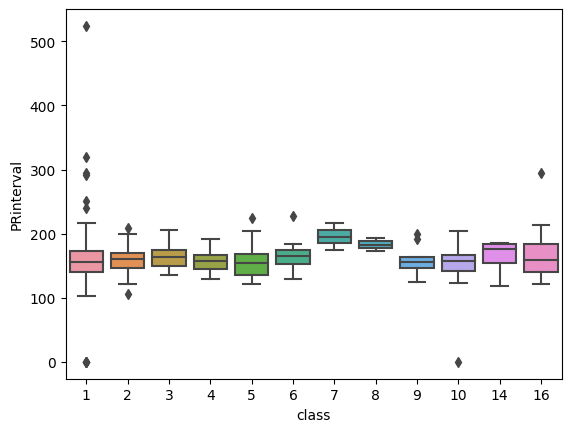

In [29]:
boxplot_for_choosen_classes('PRinterval', classes)

W klasie 7 widać, że interwał PR jest znacznie bardziej wydłużony w stosunku do reszty arytmii. Może to świadczyć, że klasa ta świadczy  **Bloku AV pierwszego stopnia**.

Następnym rodzajem arytmii jest **Blok oddziału wiązki**. Arytmię tę można rozpoznać po szerszym od normalnego zespole QRS oraz załamku T, który jest skierowany na przeciw QRS.

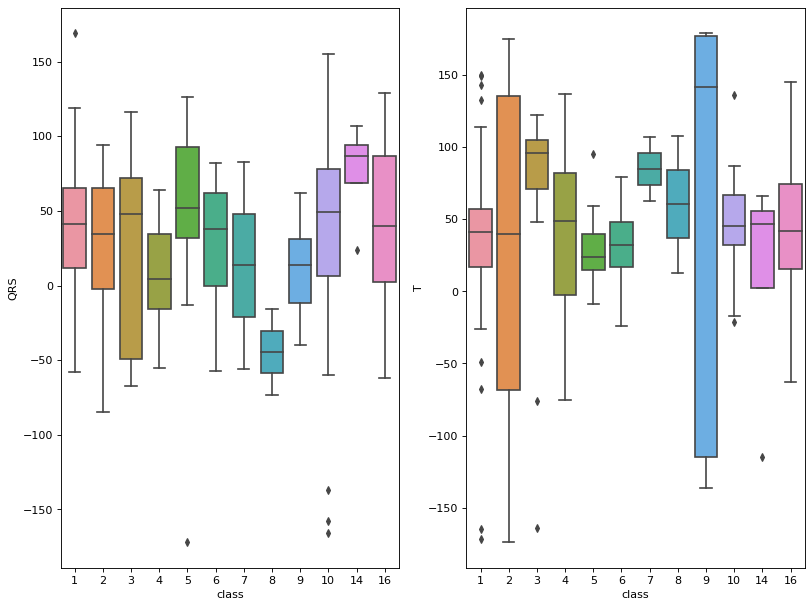

In [30]:
boxplot_for_choosen_classes_for_some_params(['QRS', 'T'], classes)

W klasie 2 widać, że przy dodatnich warościach QRS występuje przeciwne T. Może to być znak, że jest to **Blok oddziału wiązki**.

Następną klasą arytmii są **Przedwczesne skurcze komorowe**. Są one spowodowane nieprawidłowymi skurczami komór serca, a nie tak jak w poprzednim przypadku przedsionków.

Skurcze te można określić za pomocą istnienia fali RT, czyli momentu, w którym fala R oraz fala T ulegają nałożeniu się na siebie wzajemnie.

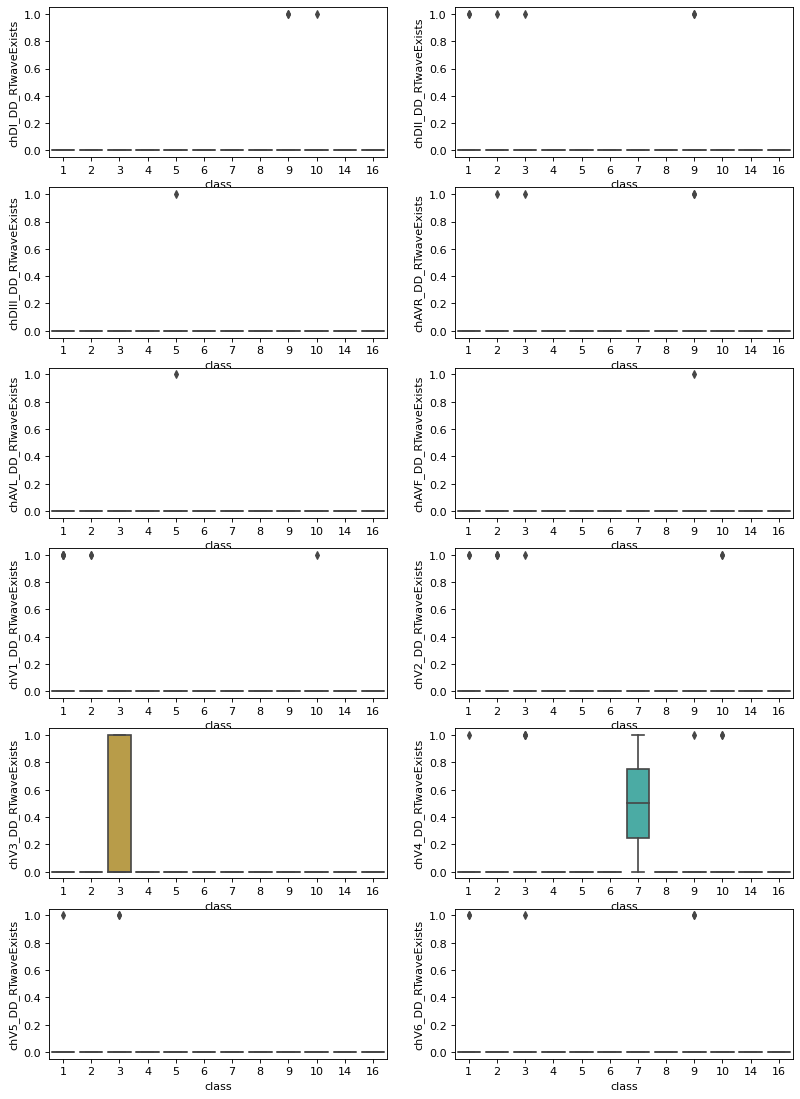

In [31]:
boxplot_for_choosen_classes_for_some_params(['chDI_DD_RTwaveExists', 'chDII_DD_RTwaveExists', 'chDIII_DD_RTwaveExists',
                                            'chAVR_DD_RTwaveExists', 'chAVL_DD_RTwaveExists', 'chAVF_DD_RTwaveExists',
                                            'chV1_DD_RTwaveExists', 'chV2_DD_RTwaveExists', 'chV3_DD_RTwaveExists',
                                            'chV4_DD_RTwaveExists', 'chV5_DD_RTwaveExists', 'chV6_DD_RTwaveExists'], classes)

Dla kanałów V3 i V3 można zauważyć taką zależność. dla kals 3 i 7

Kolejnym rodzajem arytmii jest **Tachykardia komorowa (V-Tach)**. Zespoły QRS w tym przypadku wyglądają dziko. A załamki T są skierowane przeciwnie i są duże.

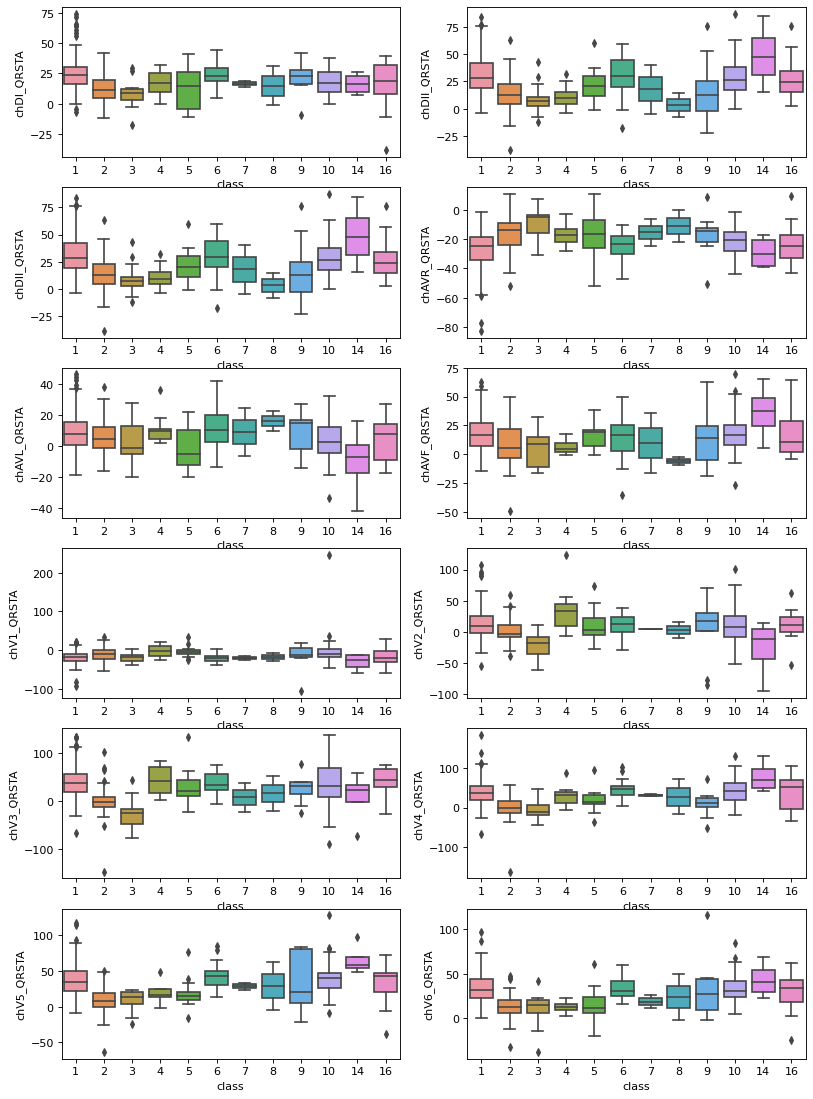

In [32]:
boxplot_for_choosen_classes_for_some_params( ['chDI_QRSTA', 'chDII_QRSTA', 'chDII_QRSTA',
                                             'chAVR_QRSTA', 'chAVL_QRSTA', 'chAVF_QRSTA',
                                             'chV1_QRSTA', 'chV2_QRSTA', 'chV3_QRSTA',
                                             'chV4_QRSTA', 'chV5_QRSTA', 'chV6_QRSTA'], classes)

Odpowiadający temu wygląd można zaobserwować w klasie 8.

# Uczenie maszynowe

W ramach uczenia maszynowego postanowiłyśmy dokonać porównania 3 klasyfikatorów. Są nimi: <br> 1. Klasyfikator najbliższego prototypu <br> 2. Klasyfikator k- najbliższych sąsiadów <br> 3. Drzewo decyzyjne

In [33]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid

Poniżej jest funkcja divide, dzieląca zbiór na testowy i uczący. Znajduje się też tam lista atryb, która jest listą atrybutów, dzięki którym dokonujemy uczenia maszynowego.

In [34]:
def divide(data, proportion):
    opis_ucz, opis_test, dec_ucz, dec_test = train_test_split(data.iloc[:,0:-2], data.iloc[:,-2].astype('category').cat.codes, test_size=proportion)
    return {"opis_ucz":opis_ucz, "opis_test":opis_test, "dec_ucz":dec_ucz, "dec_test":dec_test}

In [35]:
atryb = [14, 102, 225, -1, 93, 107, 119, 6, 9, 10, 11, 121]

Poniższa funckja służy do weryfikacji wyników uczenia.

In [36]:
def verify(model,dane, atryb):
    wynik_ucz = model.predict(dane["opis_ucz"].iloc[:, atryb])
    wynik_test = model.predict(dane["opis_test"].iloc[:, atryb])
    
    mp = confusion_matrix(dane["dec_ucz"], wynik_ucz)
    print("macierz pomyłek - zbiór uczący, dokładność:",np.sum(np.diag(mp))/np.sum(mp))
    
    df_cm = pd.DataFrame(mp, range(12), range(12))
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})
    plt.show()
    
    mp = confusion_matrix(dane["dec_test"],wynik_test)
    print("macierz pomyłek - zbiór testowy, dokładność:",np.sum(np.diag(mp))/np.sum(mp))
    df_cm = pd.DataFrame(mp, range(12), range(12))
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})
    plt.show()

### Klasyfikacja najbliższego prototypu

Klasyfikator najbliższego prototypu polega na tym, że dla każdej z klas wybieramy obiekt będący jej "prototypem". Obiekty przyporządkowywujemy obliczając odległości do tych protoypów i wybierając prototyp znajdujący się najbliżej. Jest to przekład eager learning.

In [37]:
division_data = divide(original_data, 0.3)

macierz pomyłek - zbiór uczący, dokładność: 0.19727891156462585


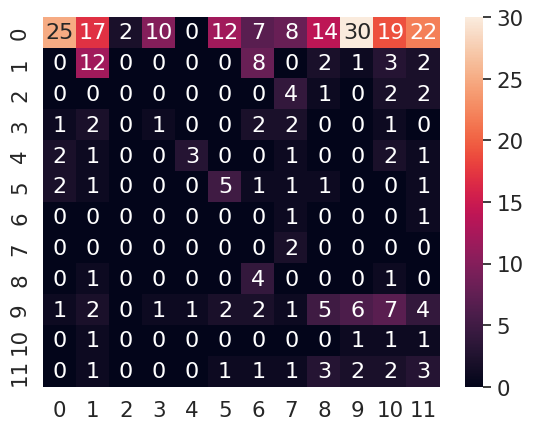

macierz pomyłek - zbiór testowy, dokładność: 0.16666666666666666


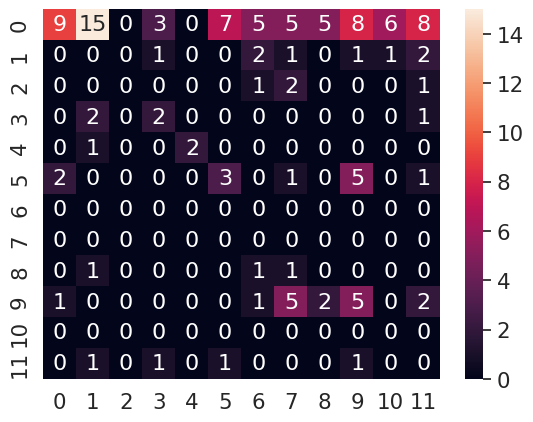

In [38]:
model = NearestCentroid()


model.fit(division_data["opis_ucz"].iloc[:, atryb], division_data["dec_ucz"])
verify(model,division_data,atryb)

### Klasyfikacja k- Najbliższych sąsiadów

Klasyfikacja k- najbliższych sąsiadów polega na obliczeniu odległości klasyfikanego obiektu do każdego z obiektów zbioru uczącego i na tej podstawie wybraniu najlepiej pasującej klasy. Jest to przykład lazy learning.

In [39]:
division_data = divide(original_data, 0.5)

macierz pomyłek - zbiór uczący, dokładność: 0.14285714285714285


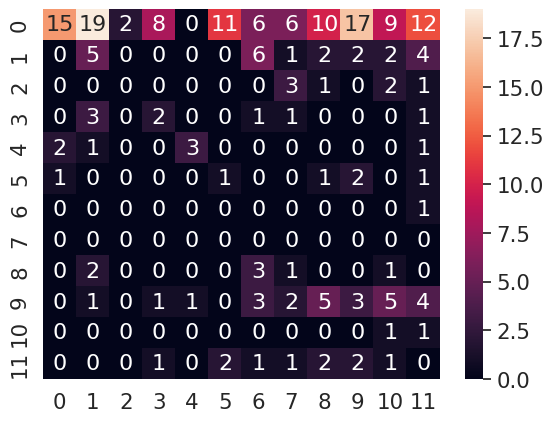

macierz pomyłek - zbiór testowy, dokładność: 0.23333333333333334


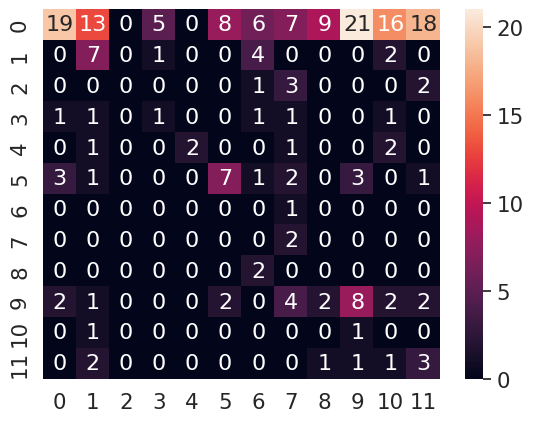

In [40]:
knn = KNeighborsClassifier(n_neighbors=12)

knn.fit(division_data['opis_ucz'], division_data['dec_ucz'])

y_pred = knn.predict(division_data['opis_test'])

verify(model, division_data, atryb)

### Drzewo decyzyjne
Drzewo decyzyjne polega na podziale zbioru na coraz mniejsze zbiory obiektów, które mają jak najbardziej podobne klasy decyzyjne.

In [44]:
division_data = divide(original_data, 0.3)

In [45]:
print('Liczba obiektów zbioru uczącego: ', len(division_data["opis_ucz"]))
print('Liczba obiektów zbioru testowego: ', len(division_data["opis_test"]))

model = tree.DecisionTreeClassifier(max_depth = 16)

model.fit(division_data["opis_ucz"].iloc[:, atryb], division_data["dec_ucz"])

Liczba obiektów zbioru uczącego:  294
Liczba obiektów zbioru testowego:  126


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=16, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Liczba obiektów zbioru uczącego:  294
Liczba obiektów zbioru testowego:  126
macierz pomyłek - zbiór uczący, dokładność: 0.9931972789115646


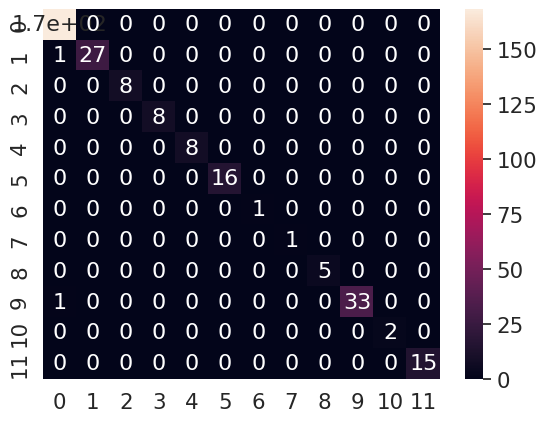

macierz pomyłek - zbiór testowy, dokładność: 0.5079365079365079


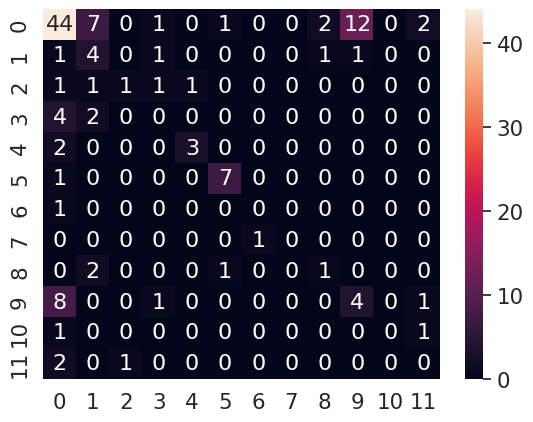

In [46]:
print('Liczba obiektów zbioru uczącego: ', len(division_data["opis_ucz"]))
print('Liczba obiektów zbioru testowego: ', len(division_data["opis_test"]))

verify(model, division_data, atryb)

## Wnioski

Najważniejszym z wniosków jest to, że analiza eksploracyjna i wiedza na temat dziedziny problemowej jest istotna do przeprowadzenia wnikliwego badania. Bez opowiedniej wiedzy w zakresie tematu poprawność uczenia dla najlepszej z metod oscylowała maksymalnie na poziomie 40%. Dopiero odpowiednie przygotowanie merytoryczne pozwoliło na poprawę rezultatów uczenia. Następnym razem od razu postawimy na zdobywanie wiedzy w dziedzinie problemowej bądź na rozmowę z osobą, która posiada takową wiedzę.

Sprawdzanie różnych klasyfikatorów także jest kluczowe do przeprowadzenia nauki. Niektóre klasyfikatory sprawdzają się lepiej, a niektóre gorzej do innych przypadków. Dla naszego projektu najlepszym klasyfikatorem jest drzewo decyzyjne, które uznajemy za ostateczny wynik uczenia.